# Import libraries

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# Exploring Dataset

In [109]:
##read dataset
df=pd.read_csv("tmdb_5000_movies.csv")
##print all features of dataset
print("featurs=",df.columns.tolist())
## what year Avatar was created
release_date=df[df["title"]=="Avatar"]["release_date"]
created_year= release_date.iloc[0].split("-")[0]
print("created year of avatar is: ",created_year)
## What was the revenue of Spectre
revenue=df[df["title"]=="Spectre"]["revenue"]
print("the revenue of Spectre is:",revenue.iloc[0])
# What rating did Pirates of the Caribbean get
rating=df[df["title"].str.contains("Pirates of the Caribbean")]["vote_average"]
# average rating of all pirates of the caribbean films
print("the rating of the Pirates of the Caribbean is:",rating.mean())
## How many action movies are present in the dataset
action_movies=df[df["genres"].str.contains('"name": "Action"')]['genres']
print("Number of Action movies in the dataset is:",action_movies.shape[0])


featurs= ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
created year of avatar is:  2009
the revenue of Spectre is: 880674609
the rating of the Pirates of the Caribbean is: 6.95
Number of Action movies in the dataset is: 1154


# Data Cleaning

In [110]:
# check if there is a missing data
print("number of missing in each feature is:\n",df.isnull().sum())
# drop unnecessary features
df.drop(["id","homepage","original_title","original_language","production_countries","overview"], axis=1, inplace=True)
print("columns now are=", df.columns.tolist())

number of missing in each feature is:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
columns now are= ['budget', 'genres', 'keywords', 'popularity', 'production_companies', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


In [111]:
## check number number of missing value after removing features
print("number of missing in each feature is:\n",df.isnull().sum())
df.dropna(inplace=True)
print("number of rows after removing nulls=",df.shape[0])
## drop rows that have a budget of zero
zero_budget_inedices=df[df["budget"]==0].index
df.drop(zero_budget_inedices, inplace=True)
print("number of rows after removing a zero budge=",df.shape[0])

number of missing in each feature is:
 budget                    0
genres                    0
keywords                  0
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title                     0
vote_average              0
vote_count                0
dtype: int64
number of rows after removing nulls= 3959
number of rows after removing a zero budge= 3368


# Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002551C6FB400>,
      dtype=object)

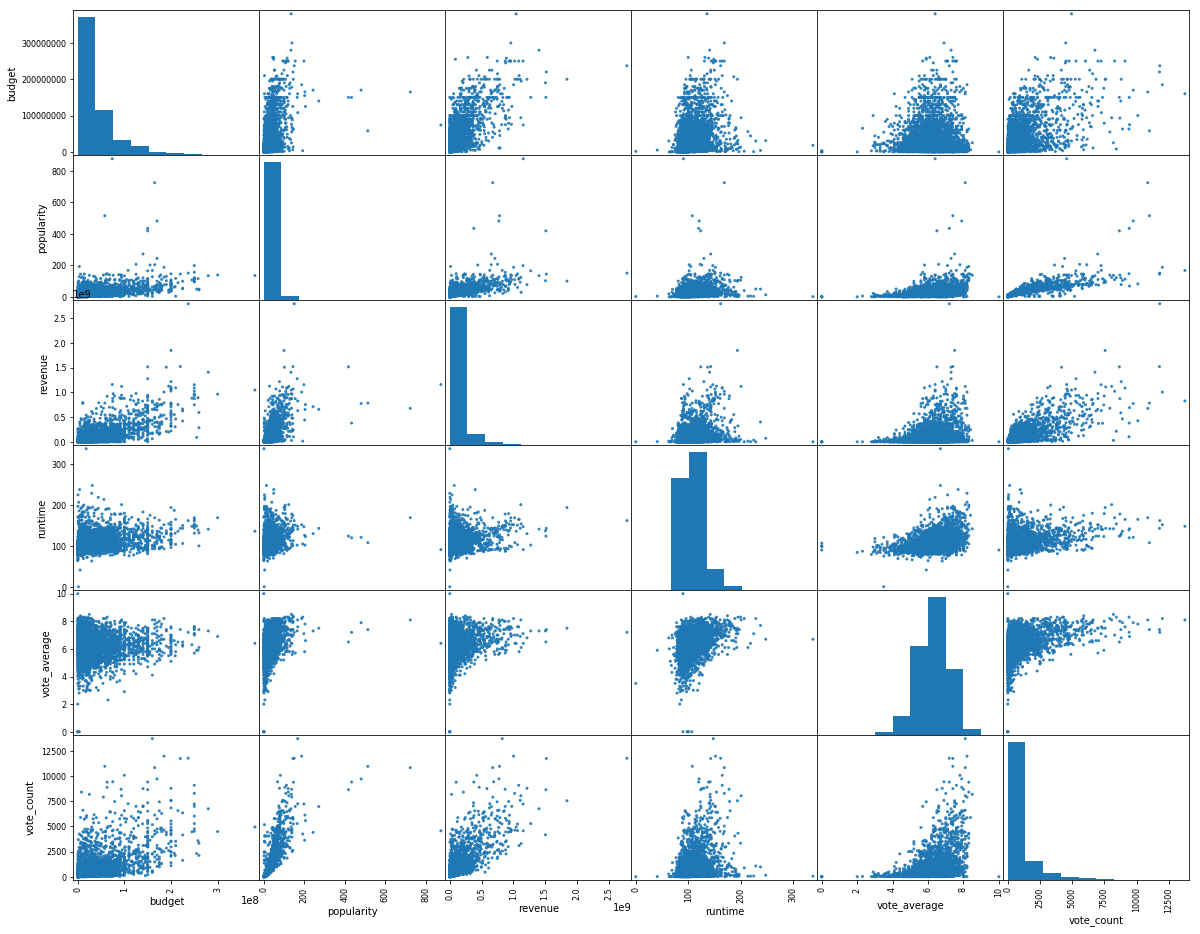

In [112]:
# print correlation matrix 
pd.plotting.scatter_matrix(df, figsize=(20,16),alpha=0.9)

# comment 
The scatter plot matrix, one can see a lot of correlation between features such as:Popularity and and vote_count (positive correlation), Vote_averag and vote_count (positive correlation)

#### pattern recognition between the movies with the highest revenues
you can find that there is positive correlation between revene and (vote_count, vote_average, popularity, and budget) features. Therefore, the highest revenu movies hava a high value of the aforementioned features.  


# Predict

In [129]:
# revenue and average_voting denote the sucess of the movie.Therefore, we will use it as a target. 
scaler=StandardScaler()
X,Y1,Y2= df.loc[:,["budget","popularity","runtime","vote_count"]], df["revenue"], df["vote_average"]
print(Y.shape[0])
print(X.shape[0])
X=scaler.fit_transform(X)
# print(X)
x1_train, x1_test, y1_train, y1_test = train_test_split(X,Y1,train_size =0.8)
model= LinearRegression()
model.fit(x1_train,y1_train)


3368
3368


LinearRegression()

In [131]:
prediction_score=model.score(x1_test,y1_test)
print("prediction_score=", prediction_score)

prediction_score= 0.7175798914157285


In [132]:
predictions=model.predict(x1_test)
print("predictions=", predictions)

predictions= [ 9.06710128e+07 -1.49106239e+07 -1.72073644e+07  1.08873438e+08
  4.80923679e+08  6.66158382e+08 -1.18287210e+07  1.03300139e+08
  9.93913665e+06 -2.54178333e+06  8.11685032e+07 -1.42569964e+07
  1.42468428e+08  5.68930897e+07  2.60479703e+07  1.15331089e+08
  5.63935640e+07  3.46012319e+07  8.20659878e+07  5.64218967e+07
  2.60588085e+08  4.77713702e+08 -1.00436008e+07  4.35821489e+07
  1.26599636e+08  1.93280888e+08  5.48222494e+08  1.12235302e+07
  1.31248313e+08  1.40321387e+08  6.49009425e+07  1.31668516e+08
  4.79623336e+08 -1.01376460e+07 -1.43462504e+07  1.66177027e+08
  1.55921825e+08  7.25544687e+07  7.34961011e+08  8.36130944e+06
  6.09363335e+08  9.05966461e+08  1.92467021e+08  5.25712702e+07
  2.55595154e+08  1.15475767e+08  1.76675072e+08  1.04958348e+08
  8.74950061e+07  2.32259449e+08  5.97585130e+07  1.24021354e+08
  7.54302167e+07 -3.30860371e+06  1.89997462e+07  2.89163297e+08
  3.30546204e+07  1.95501636e+08  4.17984961e+07  1.87670355e+07
  1.29361856